# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2

In [970]:
###Import required libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [37]:
df = pd.read_csv("grades.csv")
grades_dict = {"S":10,"A":9,"B":8,"C":7,"D":6,"E":4,"F":0}

In [38]:
# write a function to do Label encoding
def label_encoding(column):
    Labeled_data = []
    for elem in column:
        Labeled_data.append(grades_dict[elem])
    return Labeled_data
df

,Name,Grades
0,Nilesh,A
1,Jhon,S
2,James,C
3,Ravi,F
4,Sita,S
5,Raju,E
6,Praful,F
7,Ganga,B
8,Ram,A
9,Rahim,S


In [39]:
df['Grades'] = list(label_encoding(df['Grades']))

In [40]:
df

,Name,Grades
0,Nilesh,9
1,Jhon,10
2,James,7
3,Ravi,0
4,Sita,10
5,Raju,4
6,Praful,0
7,Ganga,8
8,Ram,9
9,Rahim,10


Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [47]:
df = pd.read_csv("color.csv")
df

,Objects,Color
0,Leaves,Green
1,Blood,Red
2,Sea,Blue
3,Rose,Red
4,Sun flower,Yellow
5,Apple,Red
6,Mango,Yellow
7,Banana,Yellow


Hint : you can achieve using pandas (no need for sklearn) check the documentation

In [48]:
# Answer
one_hot_vec = pd.get_dummies(df['Color'])
df[one_hot_vec.columns] = one_hot_vec
df

,Objects,Color,Blue,Green,Red,Yellow
0,Leaves,Green,0,1,0,0
1,Blood,Red,0,0,1,0
2,Sea,Blue,1,0,0,0
3,Rose,Red,0,0,1,0
4,Sun flower,Yellow,0,0,0,1
5,Apple,Red,0,0,1,0
6,Mango,Yellow,0,0,0,1
7,Banana,Yellow,0,0,0,1


Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


1. grades.csv : {S,A,B,C,D,E,F}    color.csv:{Blue,Gree,Red,Yellow}
2. grades.csv : S>A>B>C>D>E>F      color.csv : No relationship
3. If relationship is there then label encoding would be suitable, if not then one-hot encoding

# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [711]:
def computeCost(X, y, theta,lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly
    m = len(y) 
    
    #Vectorized implementation
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    
    return J

In [712]:
def gradientDescent(X,y,theta,alpha,lamda,max_iters,precision):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values
    m = np.size(y)
    J_history = np.zeros(max_iters)
    
    for i in range(max_iters):
        #Cost and intermediate values for each iteration
        J_history[i] = computeCost(X,y,theta,lamda)
        #Grad function in vectorized form
        h = np.dot(X,theta)
        theta = theta - alpha*(1/m)*(np.dot(X.T,(h-y))+lamda*theta)
  
    return theta,J_history

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [727]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

In [732]:
# Write you code Here
X = data['X_train']
y = data['y_train']
X = X[:,np.newaxis]
y = y[:,np.newaxis]
X_appended = np.concatenate((np.ones((len(X),1)),X),axis=1)

In [733]:
# initialize fitting parameters with zeros
theta = np.random.normal(size=(4,1))
precision = 0.00001
alpha = 0.0001
lamda1 = 0
lamda2 = 100
lamda3 = 10000
max_iters = 1000

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_appended = np.concatenate((np.ones((len(X_train_poly),1)),X_train_poly),axis=1)
theta1, J1 = gradientDescent(X_appended,y,theta,alpha,lamda1,max_iters,precision)
theta2, J2 = gradientDescent(X_appended,y,theta,alpha,lamda2,max_iters,precision)
theta3, J3 = gradientDescent(X_appended,y,theta,alpha,lamda3,max_iters,precision)

Text(0.5, 1.0, 'Lambda = 0')

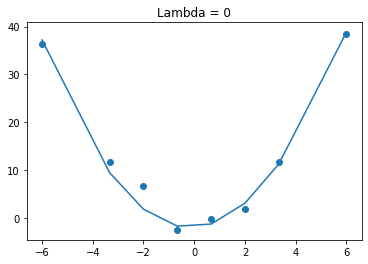

In [735]:
### Fit 1
pred1 = np.dot(X_appended,theta1)
pred = pred1[:,0]
X1 = X[:,0]
index = np.argsort(X1)
X1 = X1[index]
pred1 = pred1[index]
plt.plot(X1,pred1)
plt.scatter(X,y)
plt.title("Lambda = 0")

Text(0.5, 1.0, 'Lambda = 100')

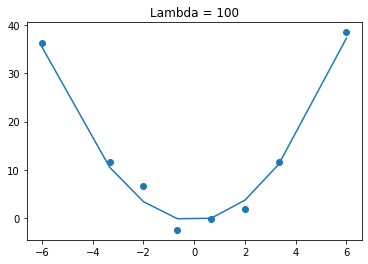

In [736]:
### Fit 2
pred2 = np.dot(X_appended,theta2)
pred2 = pred2[:,0]
X2 = X[:,0]
index = np.argsort(X2)
X2 = X2[index]
pred2 = pred2[index]
plt.plot(X2,pred2)
plt.scatter(X,y)
plt.title("Lambda = 100")

Text(0.5, 1.0, 'Lambda = 10000')

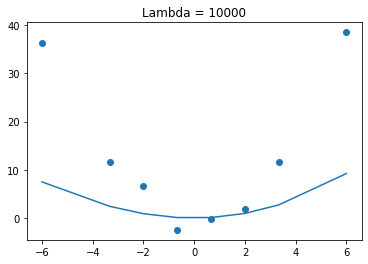

In [737]:
### Fit 3
pred3 = np.dot(X_appended,theta3)
pred3 = pred3[:,0]
X3 = X[:,0]
index = np.argsort(X3)
X3 = X3[index]
pred3 = pred3[index]
plt.plot(X3,pred3)
plt.scatter(X,y)
plt.title("Lambda = 10000")

As lambda increases, the data is fit less as the model's focus shifts to having low theta values

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

In [945]:
''' Import neccessay packages '''

def regression(X,Y,reg_type,degree,alpha):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    X = X[:,np.newaxis]
    Y = Y[:,np.newaxis]
    
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    X_poly = poly.fit_transform(X)
    if reg_type == "ridge":
        reg = linear_model.Ridge(alpha=alpha,max_iter=10**6)
    elif reg_type == "linear":
        reg = linear_model.LinearRegression()
    elif reg_type == "lasso":
        reg = linear_model.Lasso(alpha=alpha,max_iter=10**6)
    
    reg.fit(X_poly,Y)
    y_hat = reg.predict(X_poly)
    mse = mean_squared_error(Y,y_hat)
    return y_hat, mse,reg

In [968]:
# Plotting and calling the function
X = data['X_train']
Y = data['y_train']
#X = X[:,np.newaxis]
#y = y[:,np.newaxis]
index = np.argsort(X)
X = X[index]
Y = Y[index]
#linear_model.Ridge(alpha=alpha,max_iter=1000).fit(X_poly,Y)
#Y1, mse1, reg1 = regression(X,y,"linear",9,0.1) 
y1,mse1,_ = regression(X,Y,"linear",9,0.1)
y2,mse2,_ = regression(X,Y,"ridge",9,0.1)
y3,mse3,_ = regression(X,Y,"lasso",9,0.1)

MSE error: 1.6365450586971017e-18


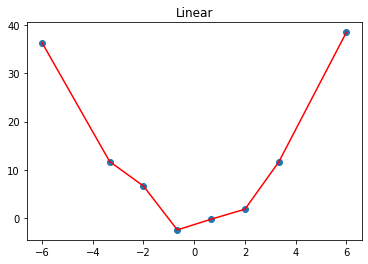

In [870]:
plt.plot(X,y1,'r')
plt.scatter(X,Y)
plt.title("Linear")
print("MSE error:",mse1)

MSE error: 0.0030610489330153215


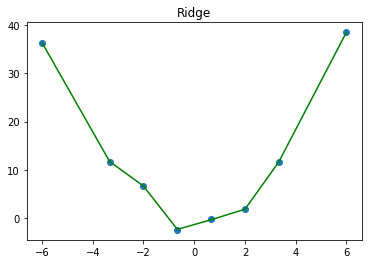

In [871]:
plt.plot(X,y2,'green')
plt.scatter(X,Y)
plt.title("Ridge")
print("MSE error:",mse2)

MSE error: 1.2275938431801827


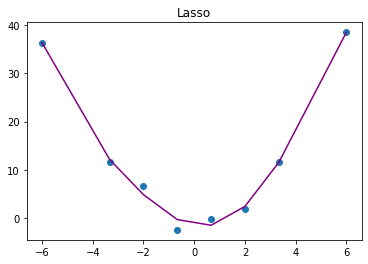

In [873]:
plt.plot(X,y3,'purple')
plt.scatter(X,Y)
plt.title("Lasso")
print("MSE error:",mse3)

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

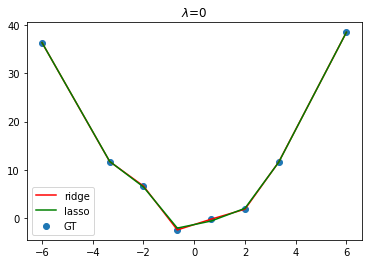

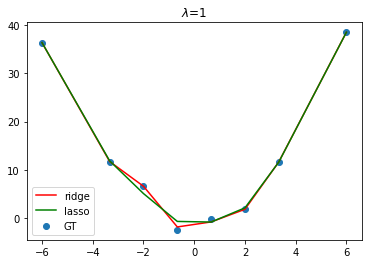

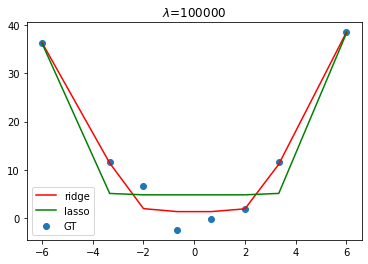

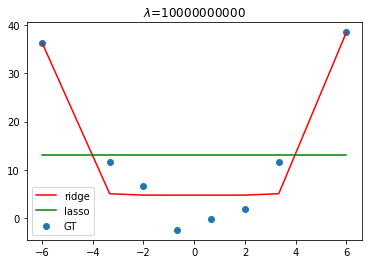

In [977]:
# Write your code here, plot the prediction on the train data, and print the coefficients learned for ridge and lasso
# You can combine both Ridge and Lasso, But for Train error vs Lambda, plot them seperately for lasso and ridge
lamdas = [0,1,10**5,10**10]
mse_r = []
mse_l = []
for lamda in lamdas:
    y_ridge, mse_ridge,_ = regression(X,Y,"ridge", 9, lamda)
    y_lasso,mse_lasso,_ = regression(X,Y,"lasso", 9, lamda)
    mse_r.append(mse_ridge)
    mse_l.append(mse_lasso)
    plt.plot(X,y_ridge,'red')
    plt.plot(X,y_lasso,'green')
    plt.scatter(X,Y)
    plt.legend(['ridge','lasso','GT'])
    plt.title(r'$\lambda$='+str(lamda))
    plt.show()

Text(0, 0.5, 'MSE')

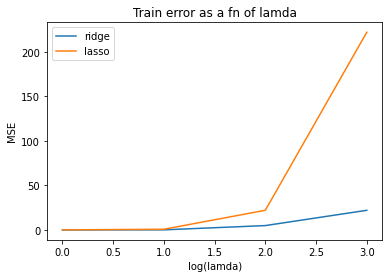

In [978]:
plt.plot(mse_r)
plt.plot(mse_l)
plt.legend(['ridge','lasso'])
plt.title("Train error as a fn of lamda")
plt.legend(['ridge','lasso'])
plt.xlabel("log(lamda)")
plt.ylabel("MSE")

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

Coefficients...............


Lambda= 0
Ridge coeff: [ 1.55320897e+00  1.60951296e-01  4.42699248e-01  4.86392978e-01
 -4.54851017e-01 -4.55958884e-02  4.68990962e-02  9.10975446e-04
 -9.62093998e-04]
Lasso coeff: [-1.14550678e+00  1.38499965e+00  1.05999422e-01 -1.81842662e-02
 -4.77370916e-04  1.79761406e-04 -2.83996252e-05  2.57116824e-06
 -3.25364936e-07]
Coefficients...............


Lambda= 1
Ridge coeff: [ 7.44108591e-01  1.59227322e-01  1.92019640e-01  4.81193000e-01
 -2.78414053e-01 -4.49907750e-02  2.98146712e-02  8.98199709e-04
 -6.17811066e-04]
Lasso coeff: [-0.00000000e+00  9.45360808e-01 -2.85468333e-02  1.97430837e-02
  1.77747810e-03 -3.71187319e-04 -1.30398605e-05 -2.44338732e-06
 -2.90013643e-07]
Coefficients...............


Lambda= 100000
Ridge coeff: [-7.44481536e-05  2.43355499e-04 -3.10644737e-04  1.58106688e-03
 -8.54353735e-04  9.95073541e-03  6.17908870e-05 -2.56149945e-04
 -9.43202860e-07]
Lasso coeff: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000

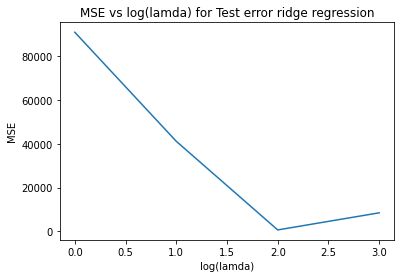

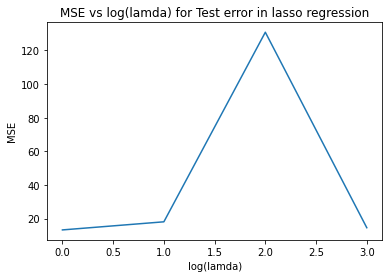

In [988]:
#Write your code here
x_test = data_test['X_test']
y_test = data_test['y_test']

x = X
y = Y

lambdas = [0,1,10**5,10*10]
mse_list_test_ridge = []
mse_list_test_lasso = []
degree = 9
poly = PolynomialFeatures(degree)
x_poly =poly.fit_transform(x.reshape(-1,1))
x_poly = x_poly[:,1:]
x_poly_test = poly.fit_transform(x_test.reshape(-1,1))
x_poly_test = x_poly_test[:,1:]

for lamda in lambdas:
    reg_ridge = Ridge(alpha = lamda).fit(x_poly, y)
    reg_lasso = Lasso(alpha = lamda).fit(x_poly, y)
    y_pred_test_lasso = reg_lasso.predict(x_poly_test)
    y_pred_train_lasso = reg_lasso.predict(x_poly)
    y_pred_test_ridge = reg_ridge.predict(x_poly_test)
    y_pred_train_ridge = reg_ridge.predict(x_poly)
    mse_list_test_lasso.append(np.mean((y_test-y_pred_test_lasso)**2))
    mse_list_test_ridge.append(np.mean((y_test-y_pred_test_ridge)**2)) 
    print("Coefficients...............\n\n")
    print("Lambda=",lamda)
    print("Ridge coeff:",reg_ridge.coef_)
    print("Lasso coeff:",reg_lasso.coef_)

plt.plot(mse_list_test_ridge)
plt.title("MSE vs log(lamda) for Test error ridge regression")
plt.xlabel("log(lamda)")
plt.ylabel("MSE")
plt.show()
plt.plot(mse_list_test_lasso)
plt.title("MSE vs log(lamda) for Test error in lasso regression")
plt.xlabel("log(lamda)")
plt.ylabel("MSE")
plt.show()

### Questions and Observations

- What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?

Ans: MSE error on train is low and on validation is very high. This is becuase a 9th degree polynomial is too complex and overfits the data
-  As value of lambda increases what happens to the model complexity?

Ans: The model complexity decreases due to penalty imposed on the parameters 

- What can be infered from the mean squared error versus lambda?

Ans: MSE error on training data increases with lamda as (model becomes less complex) but on test set it decreases since the model reduces bias and generalizes well to new examples (Bias-Variance tradeoff)

- Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)

Ans: False (Regularization is more of an external smoothing parameter, but the degree of the polynomial fundamentally changes the way the data is fit). This is evident in the case when the model is already under fit. In such a scenario regularization cannot be used to improve the model.

- Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?
 
1. Train error vs lambda: Increases for both ridge and lasso
2. Terror vs lambda: Ridge (Decreases, then increases), Lasso: (Increases, then decreases)